# 🌍 Exploratory Data Analysis Roadmap

<div style='background-color:#212121; color:#fff; border-left: 6px solid #1976d2; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#1976d2; font-size:18px;'>Project Overview</b>

<ul>

<li>This notebook provides a step-by-step guide for robust exploratory data analysis (EDA) and feature engineering using the <b>Global Country Information Dataset (2023)</b>.</li>

<li>Whether you have a specific goal or are exploring the data for insights, this workflow will help you uncover patterns, relationships, and actionable findings for further analysis or modeling.</li>

</ul>

</div>

## 1. Data Overview

<div style='background-color:#212121; color:#fff; border-left: 6px solid #388e3c; padding: 16px; font-size: 15px; line-height: 1.7;'>

<b style='color:#388e3c; font-size:17px;'>Purpose</b>: Understand the structure and content of the dataset.
<ul>

<li>List all columns, data types, and preview sample records to get a sense of the available features and their formats.</li>

</ul>

</div>

In [ ]:
import pandas as pd
import ydata_profiling as pp
import sweetviz as sv

df = pd.read_csv('../../data/cleaned/world_data_2023_cleaned.csv')

# # Generate profiling report
# profile = pp.ProfileReport(df, title="World Data 2023 Profiling Report", explorative=True)
# profile.to_file("../../data/cleaned/world_data_2023_profiling_report.html")

# # Generate Sweetviz report
# sweet_report = sv.analyze(df)
# sweet_report.show_html("../../data/cleaned/world_data_2023_sweetviz_report.html")

# List columns, types, and show a sample
print(df.info())
df.head()
df.describe()

/opt/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 32.65it/s]0:00 -> (00:00 left)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)     



Report ../../data/cleaned/world_data_2023_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    195 non-null    object 
 1   density_p_km2                              175 non-null    float64
 2   abbreviation                               188 non-null    object 
 3   agricultural_land_pct                      188 non-null    float64
 4   land_area_km2                              174 non-null    float64
 5   armed_forces_size                          157 non-null    float64
 6   birth_rate                                 169 non-null    float64
 7   calling_code                               194 n

,density_p_km2,agricultural_land_pct,land_area_km2,armed_forces_size,birth_rate,calling_code,co2_emissions,cpi,cpi_change_pct,fertility_rate,...,out_of_pocket_health_expenditure,physicians_per_thousand,population,population:_labor_force_participation_pct,tax_revenue_pct,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
count,175.000000,188.000000,1.740000e+02,157.00000,169.000000,194.000000,1.880000e+02,178.000000,179.000000,188.000000,...,188.000000,168.000000,1.740000e+02,176.000000,169.000000,183.000000,176.000000,1.700000e+02,194.000000,194.000000
mean,136.285714,39.117553,3.439145e+05,89490.44586,19.763018,360.546392,1.777992e+05,190.460955,6.722346,2.698138,...,32.637234,1.696012,1.844273e+07,62.738068,16.573964,40.822404,6.886364,1.064374e+07,19.092351,20.232434
std,137.690927,21.783052,4.773997e+05,128506.34115,8.677308,323.236419,8.387903e+05,397.947380,24.450414,1.282267,...,19.172697,1.353413,2.475196e+07,10.502907,6.961632,20.557662,5.079216,1.458261e+07,23.961779,66.716110
min,7.000000,0.600000,3.490000e+02,1000.00000,8.600000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.200000,0.070000,7.714200e+04,38.000000,0.000000,8.000000,0.090000,3.896400e+04,-40.900557,-175.198242
25%,40.000000,21.700000,2.822525e+04,11000.00000,11.780000,82.500000,2.304250e+03,113.885000,1.000000,1.705000,...,17.450000,0.395000,2.384412e+06,56.150000,11.700000,30.600000,3.395000,1.485626e+06,4.544175,-7.941496
50%,89.000000,39.600000,1.195110e+05,29000.00000,17.950000,255.500000,1.230300e+04,125.340000,2.300000,2.245000,...,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,203.000000,55.375000,4.597038e+05,124000.00000,27.070000,506.750000,6.388425e+04,157.265000,4.250000,3.597500,...,43.975000,2.772500,2.570395e+07,69.500000,21.100000,48.000000,9.490000,1.111056e+07,40.124603,48.281523
max,667.000000,82.600000,2.344858e+06,634000.00000,37.910000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,...,81.600000,4.620000,1.260140e+08,86.800000,37.200000,219.600000,28.180000,6.432484e+07,64.963051,178.065032


## 2. Summary Statistics & Distribution Visualization

<div style='background-color:#212121; color:#fff; border-left: 6px solid #fbc02d; padding: 16px; font-size: 15px; line-height: 1.7;'>

<b style='color:#fbc02d; font-size:17px;'>Purpose</b>: Explore key statistics and visualize distributions for numeric columns to identify skewness, outliers, and data quality issues.
<ul>

<li>Generate descriptive statistics, histograms, and KDE plots for main features. Use these insights to guide feature engineering and further analysis.</li>

</ul>

</div>

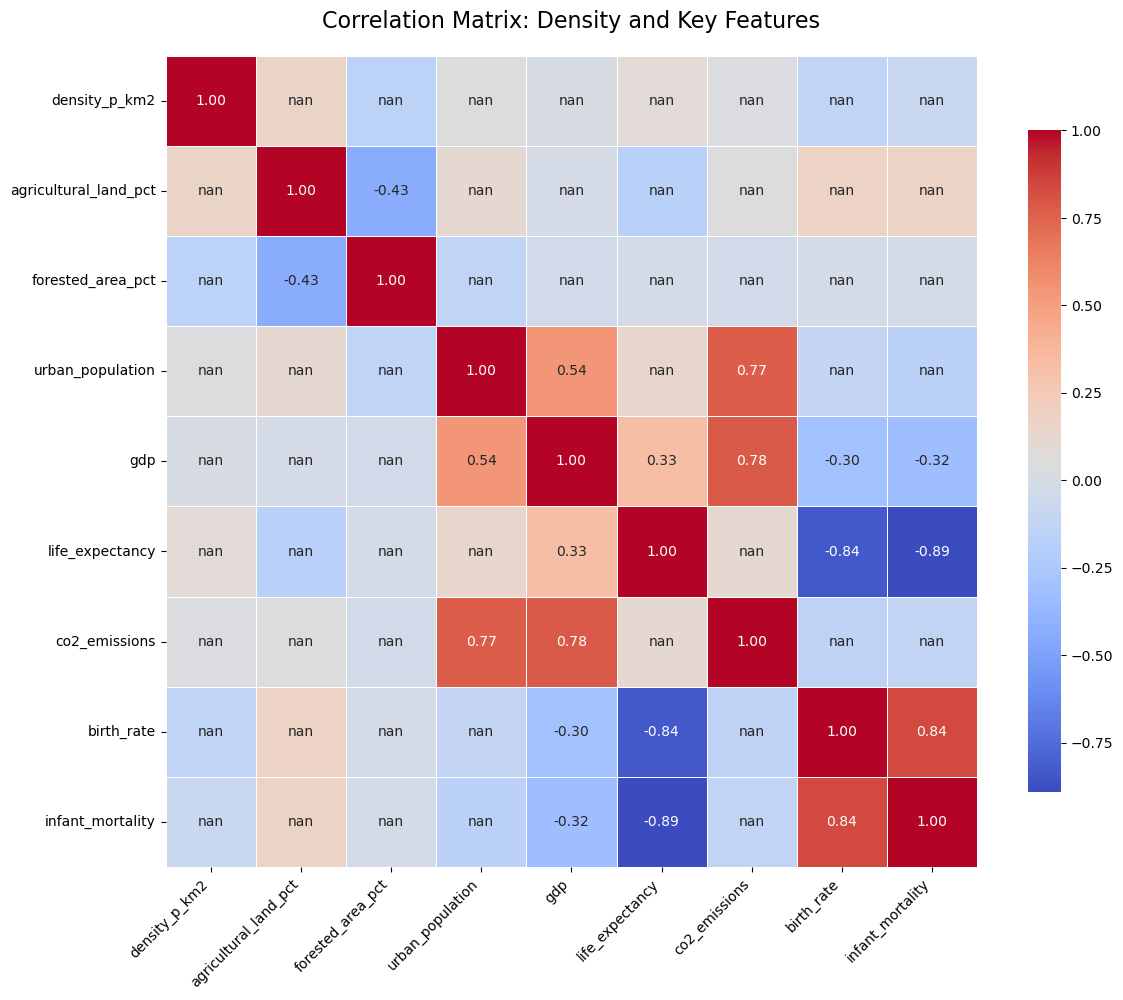

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

PLOT_PATH = "../../results/task-a/plots/"

# Correlation matrix for key features
correlation_columns = [
    'density_p_km2',
    'agricultural_land_pct',
    'forested_area_pct',
    'urban_population',
    'gdp',
    'life_expectancy',
    'co2_emissions',
    'birth_rate',
    'infant_mortality'
]

# Looking at correlations
correlation_matrix = df[correlation_columns].corr()

# Create annotation array with NaN for correlations < 0.3
annot_array = correlation_matrix.values.copy()
for i in range(len(annot_array)):
    for j in range(len(annot_array)):
        if abs(annot_array[i,j]) < 0.3:
            annot_array[i,j] = np.nan


plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=annot_array, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Density and Key Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'correlation_matrix.png', dpi=300)
plt.show()

## 2.1 Key Insights: GDP and Land Use Relationships with Life Expectancy, Birth Rate, and Infant Mortality

<div style='background-color:#212121; color:#fff; border-left: 6px solid #ff9800; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#ff9800; font-size:18px;'>Exploratory Data Analysis (EDA) of Global Country Dataset (2023)</b>

<ul>

<li><b style='color:#ffd54f;'>Log Transformation of GDP:</b> Applied <code>np.log1p</code> to GDP to reduce skewness and reveal underlying patterns.</li>

<li><b style='color:#ffd54f;'>Agricultural Land % vs Forested Area %:</b> Clear negative relationship—countries with more agricultural land tend to have less forested area, and vice versa. This highlights land use trade-offs and the presence of countries with little of either (urban/desert nations).</li>

<li><b style='color:#ffd54f;'>GDP vs Life Expectancy:</b> Weak positive trend—higher GDP is generally associated with higher life expectancy, but the relationship is not strong. Other factors (healthcare, education, environment) play significant roles.</li>

<li><b style='color:#ffd54f;'>GDP vs Birth Rate:</b> Weak negative trend—countries with higher GDP tend to have lower birth rates, but the data is scattered, indicating influence from cultural and policy differences.</li>

<li><b style='color:#ffd54f;'>GDP vs Infant Mortality:</b> Strong negative relationship—higher GDP strongly correlates with lower infant mortality rates. Many countries perform better than expected, highlighting the impact of economic development on child health.</li>

</ul>

<b style='color:#ff9800;'>Summary:</b> Log-transforming GDP improves visibility of trends, but only the relationship with infant mortality is strong and clear. Life expectancy and birth rate are influenced by a broader set of factors. Land use analysis reveals important trade-offs between agriculture and forest conservation. These insights demonstrate the importance of combining statistical analysis with domain knowledge for robust EDA.

</div>

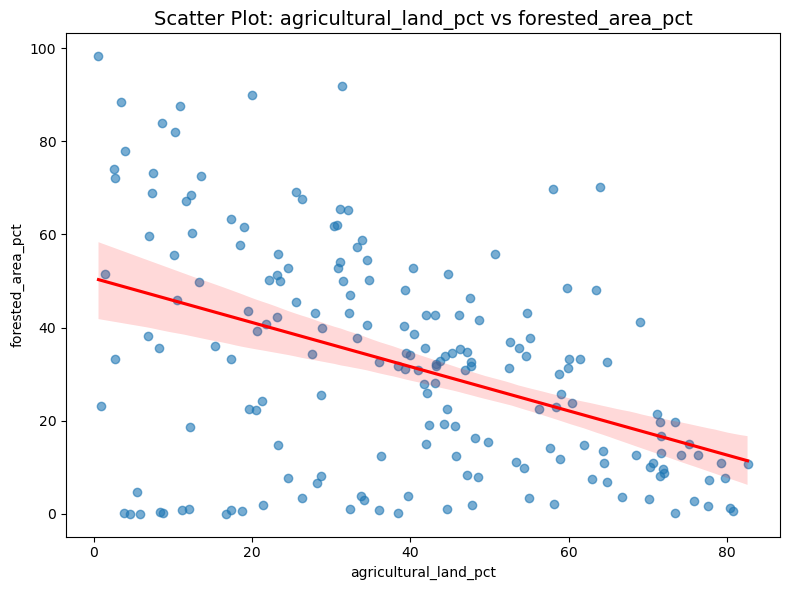

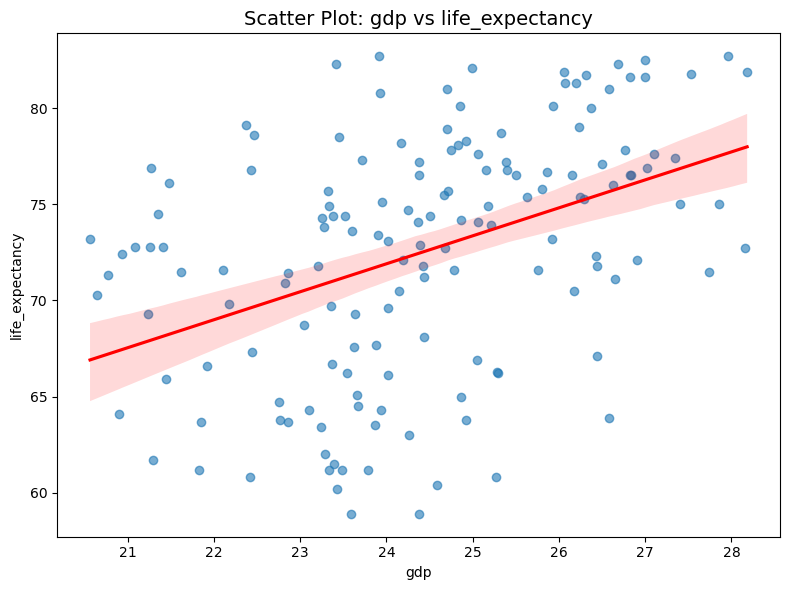

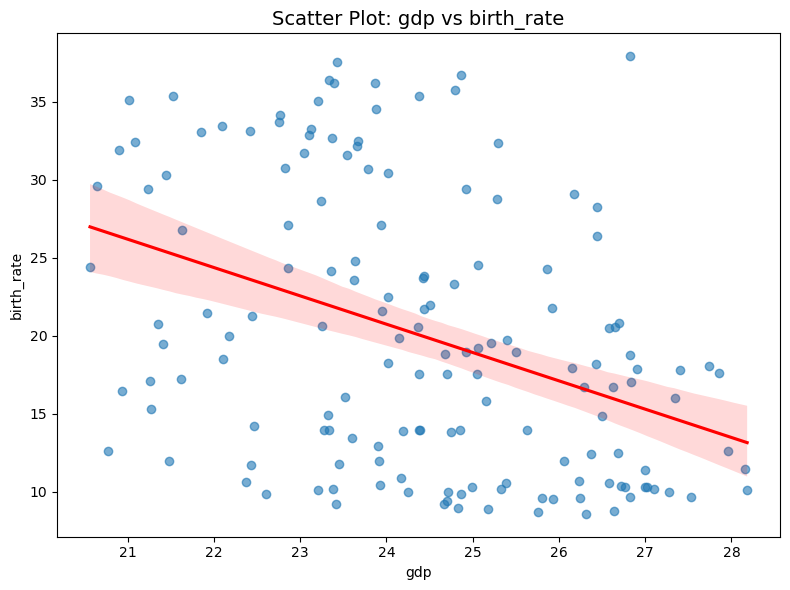

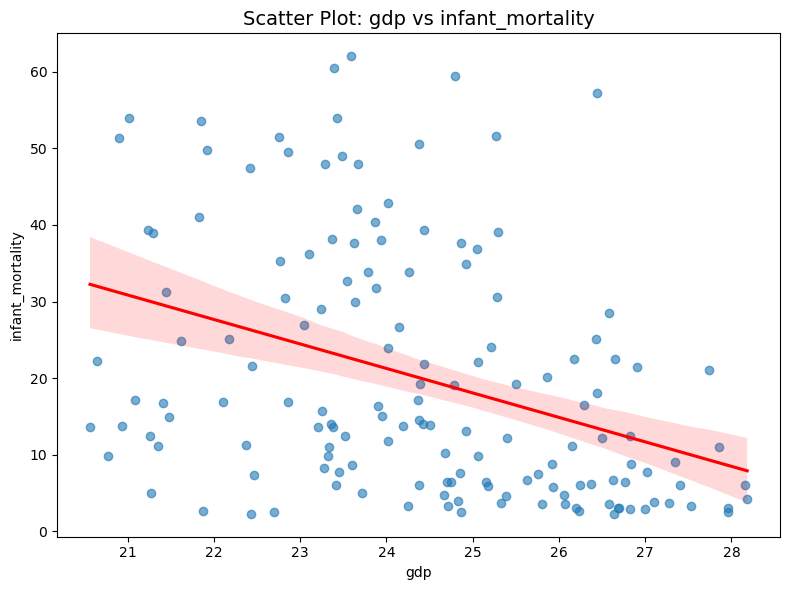

In [44]:
# Scatter plots for weak correlations
weak_corr_pairs = [
    ('agricultural_land_pct', 'forested_area_pct'),
    ('gdp', 'life_expectancy'),
    ('gdp', 'birth_rate'),
    ('gdp', 'infant_mortality')
]

# Build scatter plots
for x_col, y_col in weak_corr_pairs:
    plt.figure(figsize=(8, 6))
    if x_col == 'gdp':
        log_gdp = np.log1p(df['gdp'])
        sns.regplot(x=log_gdp, y=df[y_col], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    else:
        sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.savefig(PLOT_PATH + f'scatter_{x_col}_vs_{y_col}.png', dpi=300)
    plt.show()  

## 2.2 Key Insights: Strong Correlations in Urbanization, Economy, Environment, and Health

<div style='background-color:#212121; color:#fff; border-left: 6px solid #4caf50; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#4caf50; font-size:18px;'>Analysis of Strong Correlations</b>

<ul>

<li><b style='color:#a5d6a7;'>Urban Population vs GDP:</b> After log transformation, the scatter plot reveals a strong positive correlation. Countries with larger urban populations tend to have higher GDP, reflecting the economic impact of urbanization. The log transformation is essential to reduce skewness and clarify the trend.</li>

<li><b style='color:#a5d6a7;'>Urban Population vs CO₂ Emissions:</b> Log-transforming both variables exposes a clear positive relationship. Nations with larger urban populations generally produce more CO₂ emissions, highlighting the environmental consequences of urbanization and industrial activity.</li>

<li><b style='color:#a5d6a7;'>Birth Rate vs Infant Mortality:</b> The original scale scatter plot shows a strong positive correlation. Countries with higher birth rates tend to have higher infant mortality rates, reflecting underlying health and development challenges. No transformation is needed for these variables.</li>

</ul>

<b style='color:#4caf50;'>Summary:</b> These strong correlations illustrate key global patterns: urbanization drives economic growth and environmental impact, while demographic factors are closely linked to health outcomes. Log transformation is crucial for highly skewed variables, but not necessary when the relationship is already clear.

</div>

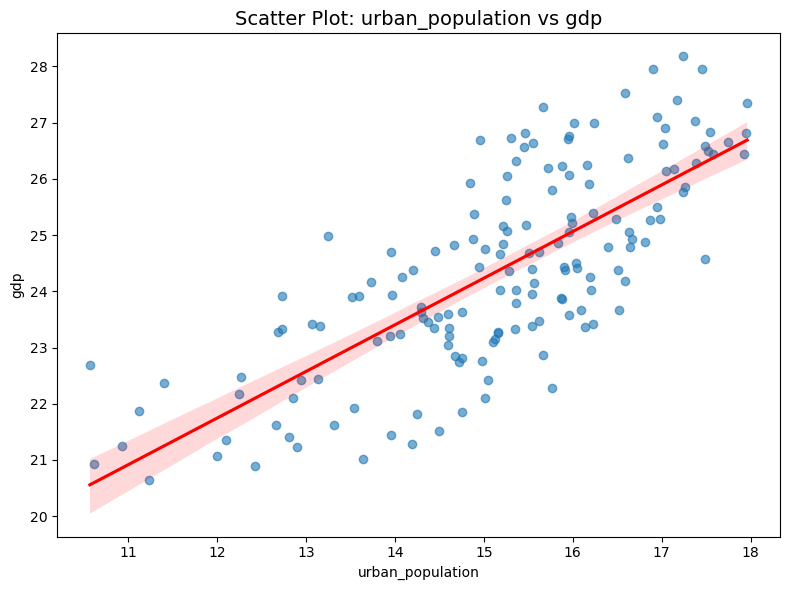

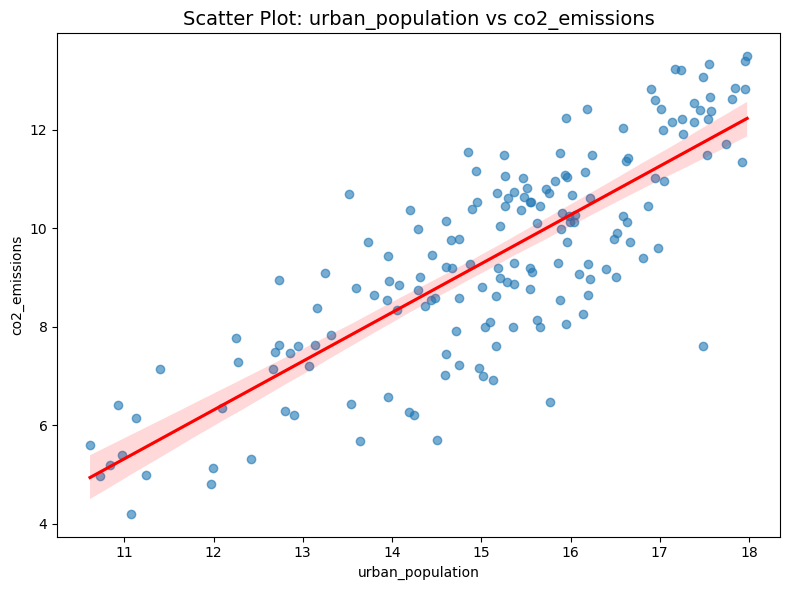

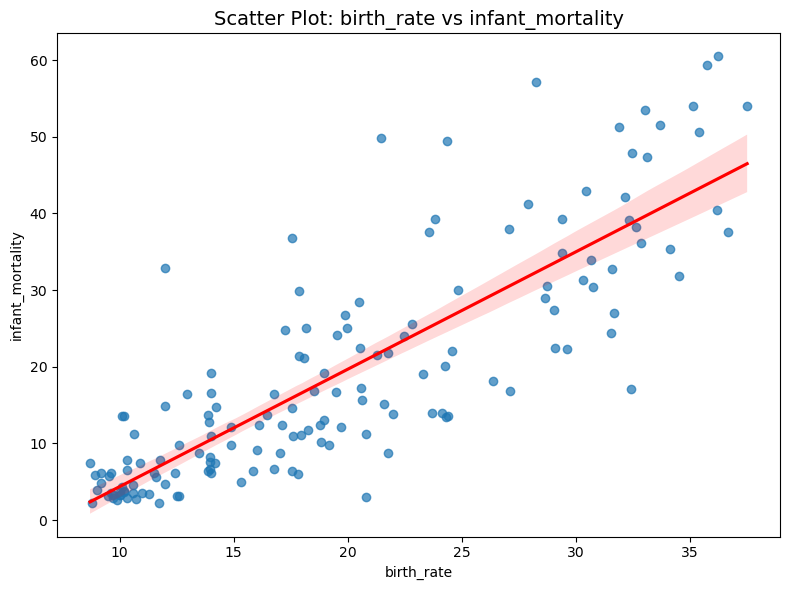

In [50]:
# Scatter plots for strong correlations
strong_corr_pairs = [
    ('urban_population', 'gdp'),
    ('urban_population', 'co2_emissions'),
    ('birth_rate', 'infant_mortality')
]

# Build scatter plots
for x_col, y_col in strong_corr_pairs:
    plt.figure(figsize=(8,6))
    if x_col =='urban_population' and y_col == 'gdp':
        log_urban = np.log1p(df['urban_population'])
        log_gdp = np.log1p(df['gdp'])
        sns.regplot(x=log_urban, y=log_gdp, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    elif x_col =='urban_population' and y_col == 'co2_emissions':
        log_urban = np.log1p(df['urban_population'])
        log_co2 = np.log1p(df['co2_emissions'])
        sns.regplot(x=log_urban, y=log_co2, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    else:  
        sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
    plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.savefig(PLOT_PATH + f'scatter_{x_col}_vs_{y_col}.png', dpi=300)
    plt.show()

## 2.3 Next Steps: Deep Dive into Economic and Social Indicators

<div style='background-color:#212121; color:#fff; border-left: 6px solid #1976d2; padding: 18px; font-size: 16px; line-height: 1.7;'>

<b style='color:#1976d2; font-size:18px;'>What to Do Next?</b>

<ul>
<li><b>1. Build a new correlation matrix</b> for the set of economic and social indicators you listed: <br>
<code>cpi, cpi_change_pct, gasoline_price, gdp, gross_primary_education_enrollment_pct, gross_tertiary_education_enrollment_pct, life_expectancy, maternal_mortality_ratio, minimum_wage, out_of_pocket_health_expenditure, physicians_per_thousand, population, unemployment_rate, population:_labor_force_participation_pct, tax_revenue_pct, total_tax_rate</code>.
</li>
<li><b>2. Visualize the new matrix</b> with a heatmap, using the same thresholding technique to highlight strong and weak relationships.</li>
<li><b>3. Interpret the results:</b> Identify clusters of highly correlated features, outliers, and unexpected relationships. Compare these findings to your previous analysis.</li>
<li><b>4. Investigate causality and actionable insights:</b> For strong correlations, consider domain knowledge and possible causal links. For weak or surprising results, hypothesize why and check for data quality issues.</li>
<li><b>5. Feature engineering:</b> Based on your findings, create new features (e.g., ratios, log transforms, interaction terms) that may improve downstream analysis or modeling.</li>
<li><b>6. Document insights:</b> Continue adding professional markdown summaries for each major step, focusing on clarity and impact for your portfolio or CV.</li>
</ul>

<b style='color:#1976d2;'>Why this step?</b> Economic and social indicators often reveal deeper patterns in development, health, and policy. By analyzing their interrelationships, you can uncover drivers of outcomes, spot redundancies, and guide feature selection for predictive modeling.

</div>

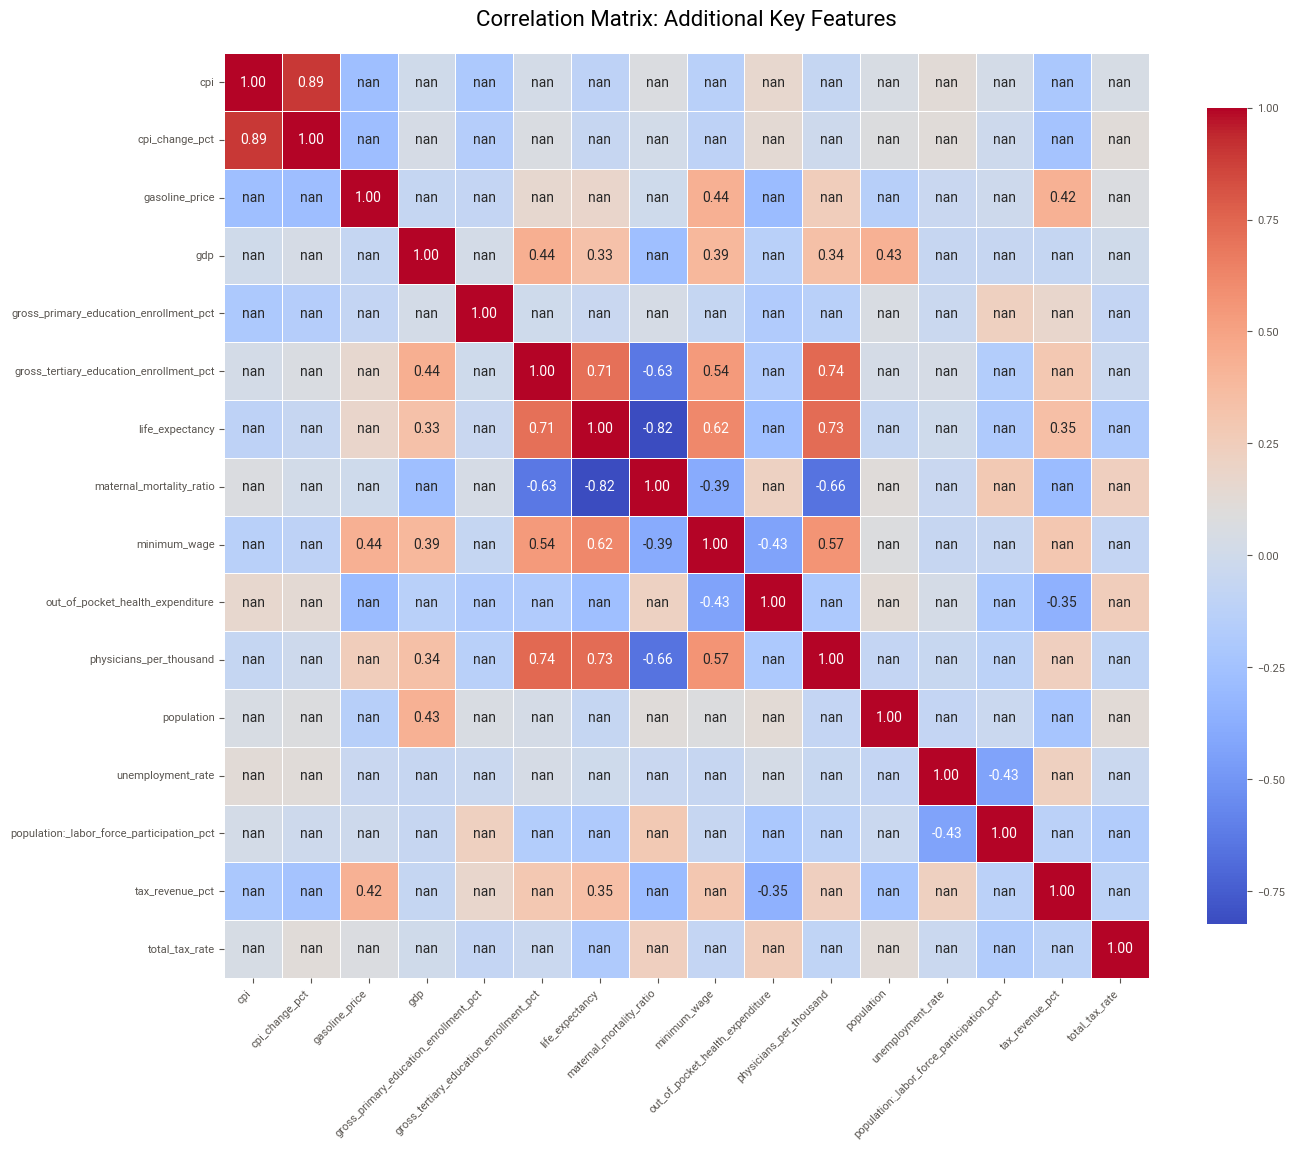

In [62]:
# Correlation matrix for additional key features
correlation_columns = [
    'cpi',
    'cpi_change_pct',
    'gasoline_price',
    'gdp',
    'gross_primary_education_enrollment_pct',
    'gross_tertiary_education_enrollment_pct',
    'life_expectancy',
    'maternal_mortality_ratio',
    'minimum_wage',
    'out_of_pocket_health_expenditure',
    'physicians_per_thousand',
    'population',
    'unemployment_rate',
    'population:_labor_force_participation_pct',
    'tax_revenue_pct',
    'total_tax_rate'
]

# Create annotation array with NaN for correlations < 0.3
annot_array = df[correlation_columns].corr().values.copy()
for i in range(len(annot_array)):
    for j in range(len(annot_array)):
        if abs(annot_array[i,j]) < 0.3:
            annot_array[i,j] = np.nan

# Looking at correlations
correlation_matrix = df[correlation_columns].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=annot_array, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Additional Key Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'correlation_matrix_economic_social.png', dpi=300)

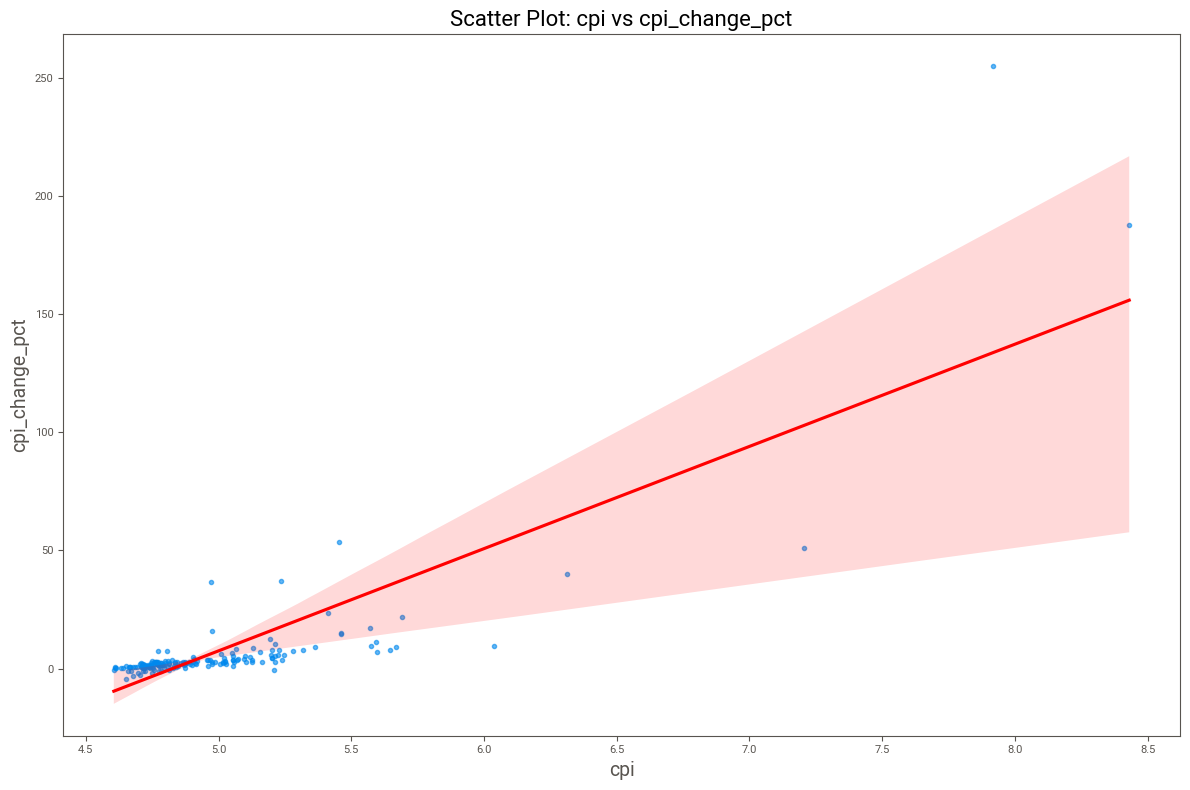

In [67]:
# Scatter plot function
def plot_scatter(x, y, df, log_x=False, log_y=False, title=None, xlabel=None, ylabel=None, save_path=None):
    plt.figure(figsize=(12,8))
    x_data = np.log1p(df[x]) if log_x else df[x]
    y_data = np.log1p(df[y]) if log_y else df[y]
    sns.regplot(x=x_data, y=y_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(title if title else f'Scatter Plot: {x} vs {y}', fontsize=16)
    plt.xlabel(xlabel if xlabel else x, fontsize=14)
    plt.ylabel(ylabel if ylabel else y, fontsize=14)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

# Scatter groups
scatter_groups = {
    'CPI Correlations': [
        {'x': 'cpi', 'y': 'cpi_change_pct', 'log_x':True},
    ],
    # 'Gasoline Price Corrections': [
    #     {'x': 'gasoline_price', 'y': 'minimum_wage'},
    #     {'x': 'gasoline_price', 'y': 'tax_revenue_pct'},
    # ],
    # 'GDP Correlations': [
    #     {'x': 'gdp', 'y': 'gross_tertiary_education_enrollment_pct', 'log_x':True},
    #     {'x': 'gdp', 'y': 'minimum_wage', 'log_x':True},
    #     {'x': 'gdp', 'y': 'physicians_per_thousand', 'log_x':True},
    #     {'x': 'gdp', 'y': 'population', 'log_x':True, 'log_y':True},
    # ],
    # 'Education Correlation': [
    #     {'x': 'gross_tertiary_education_enrollment_pct', 'y': 'life_expectancy'},
    #     {'x': 'gross_tertiary_education_enrollment_pct', 'y': 'maternal_mortality_ratio'},
    #     {'x': 'gross_tertiary_education_enrollment_pct', 'y': 'minimum_wage'},
    #     {'x': 'gross_tertiary_education_enrollment_pct', 'y': 'physicians_per_thousand'},
    # ],
    # 'Life Expectancy Correlations': [
    #     {'x': 'life_expectancy', 'y': 'maternal_mortality_ratio'},
    #     {'x': 'life_expectancy', 'y': 'minimum_wage'},
    #     {'x': 'life_expectancy', 'y': 'physicians_per_thousand'},
    #     {'x': 'life_expectancy', 'y': 'tax_revenue_pct'},
    # ],
    # 'Maternal Mortality Correlations': [
    #     {'x': 'maternal_mortality_ratio', 'y': 'minimum_wage'},
    #     {'x': 'maternal_mortality_ratio', 'y': 'physicians_per_thousand'},
    # ],
    # 'Minimum Wage Correlations': [
    #     {'x': 'minimum_wage', 'y': 'out_of_pocket_health_expenditure'},
    #     {'x': 'minimum_wage', 'y': 'physicians_per_thousand'},
    # ],
    # 'Out of Pocket Health Expenditure Correlations': [
    #     {'x': 'out_of_pocket_health_expenditure', 'y': 'tax_revenue_pct'},
    # ],
    # 'Unemployment Rate Correlations': [
    #     {'x': 'unemployment_rate', 'y': 'population:_labor_force_participation_pct'},
    # ]
}


# Automate scatter plots
for group_name, pairs in scatter_groups.items():
    for pair in pairs:
        plot_scatter(
            x=pair['x'],
            y=pair['y'],
            df=df,
            log_x=pair.get('log_x', False),
            log_y=pair.get('log_y', False),
            title=f'Scatter Plot: {pair["x"]} vs {pair["y"]}',
            xlabel=pair['x'],
            ylabel=pair['y'],
            save_path=PLOT_PATH + f'scatter_{pair["x"]}_vs_{pair["y"]}'
        )

## 2.4 Outlier Detection & Annotation: CPI Change
<div style='background-color:#212121; color:#fff; border-left: 6px solid #ff9800; padding: 18px; font-size: 16px; line-height: 1.7;'>
<b style='color:#ff9800; font-size:18px;'>What was accomplished in this section?</b>
<ul>
<li><b style='color:#ffd54f;'>Identified countries with extreme CPI change rates using the 95th percentile threshold.</b></li>
<li><b style='color:#ffd54f;'>Displayed outlier details for further investigation.</b></li>
<li><b style='color:#ffd54f;'>Annotated outlier countries directly on the CPI vs CPI Change scatter plot for clear visual context.</b></li>
</ul>
<b style='color:#ff9800;'>Summary:</b> This step highlights economic anomalies and supports deeper analysis of inflation outliers, improving interpretability and guiding further feature engineering.
</div>

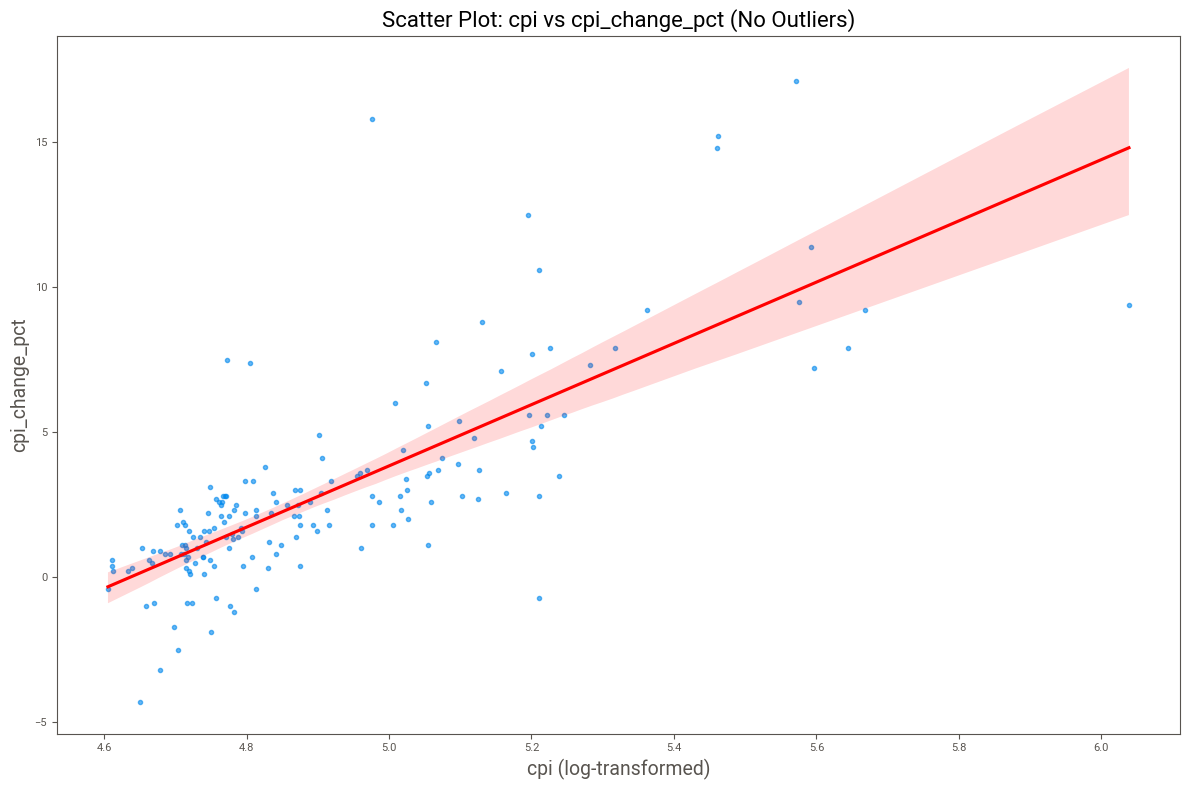

In [ ]:
# Identify outliers in CPI vs CPI Change Percentage
threshold = df['cpi_change_pct'].quantile(0.95)
outliers = df[df['cpi_change_pct'] > threshold]

# Display outlier details
print("Outliers (cpi_change_pct > 95th percentile):")
print(outliers[['country', 'cpi', 'cpi_change_pct']])

# Annotate outliers on the scatter plot
plt.figure(figsize=(12,8))
x_data = np.log1p(df['cpi'])
y_data = df['cpi_change_pct']
sns.regplot(
    x=x_data,
    y=y_data,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
for idx, row in outliers.iterrows():
    plt.annotate(
        row['country'],
        (np.log1p(row['cpi']), row['cpi_change_pct']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='blue'
    )
plt.title('Scatter Plot: cpi vs cpi_change_pct with Outliers Annotated', fontsize=16)
plt.xlabel('cpi (log-transformed)', fontsize=14)
plt.ylabel('cpi_change_pct', fontsize=14)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'scatter_cpi_vs_cpi_change_pct_outliers.png', dpi=300)
plt.show()


## 2.5 Excluding Outliers for Clearer Analysis
<div style='background-color:#212121; color:#fff; border-left: 6px solid #388e3c; padding: 18px; font-size: 16px; line-height: 1.7;'>
<b style='color:#388e3c; font-size:18px;'>What was accomplished in this section?</b>
<ul>
<li><b style='color:#81c784;'>Filtered out countries with extreme CPI change rates to focus on typical inflation cases.</b></li>
<li><b style='color:#81c784;'>Replotted CPI vs CPI Change scatter plot without outliers for improved interpretability.</b></li>
<li><b style='color:#81c784;'>Enabled more accurate visual analysis of the main data distribution.</b></li>
</ul>
<b style='color:#388e3c;'>Summary:</b> This step refines the analysis by removing outliers, allowing for clearer insights into the relationship between CPI and inflation rates among most countries.
</div>

In [ ]:
# Exlude outliers and re-plot
df_no_outliers = df[df['cpi_change_pct'] <= threshold]
plot_scatter(
    x='cpi',
    y='cpi_change_pct',
    df=df_no_outliers,
    log_x=True,
    title='Scatter Plot: cpi vs cpi_change_pct (No Outliers)',
    xlabel='cpi (log-transformed)',
    ylabel='cpi_change_pct',
    save_path=PLOT_PATH + 'scatter_cpi_vs_cpi_change_pct_no_outliers.png'
)

## 2.7 Feature Engineering: Dynamic Economic Classification
<div style='background-color:#212121; color:#fff; border-left: 6px solid #1976d2; padding: 18px; font-size: 16px; line-height: 1.7;'>
<b style='color:#1976d2; font-size:18px;'>What was accomplished in this section?</b>
<ul>
<li><b style='color:#64b5f6;'>Defined a robust function to classify countries' economic status based on CPI change percentage.</b></li>
<li><b style='color:#64b5f6;'>Created a new <code>economic_flag</code> column to dynamically label each country as experiencing deflation, stable prices, normal inflation, high inflation, or hyperinflation.</b></li>
<li><b style='color:#64b5f6;'>Enabled clear, interpretable groupings for downstream analysis, reporting, and modeling.</b></li>
<li><b style='color:#64b5f6;'>Demonstrated best practices in feature engineering for economic indicators.</b></li>
</ul>
<b style='color:#1976d2;'>Summary:</b> This step enhances the dataset's interpretability and analytical power by providing actionable, domain-driven labels for each country's inflation status. The approach is fully dynamic and ready for further EDA or predictive modeling.
</div>

In [72]:
# Function to classify economic conditions based on cpi_change_pct
def classify_economy(cpi_change_pct):
    if cpi_change_pct < 0:
        return 'deflation'
    elif 0 <= cpi_change_pct < 1:
        return 'stable_prices'
    elif 1 <= cpi_change_pct <= 5:
        return 'normal_inflation'
    elif 5 < cpi_change_pct <= 30:
        return 'high_inflation'
    else:
        return 'hyperinflation'
        

# Create flag column for economic outliers
df['economic_flag'] = df['cpi_change_pct'].apply(classify_economy)
df['economic_flag'].value_counts()

economic_flag
normal_inflation    95
high_inflation      33
stable_prices       29
hyperinflation      23
deflation           15
Name: count, dtype: int64